# **Google Play Store: Machine Learning Prediction**

**Objectives:**
- Split data into training data and test data
- Apply machine learning to predict the app ratings

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load the dataframe

Read the dataset 'google playstore data' and 'google playstore user reviews'.

In [2]:
#Read google playstore data
df_data = pd.read_csv("googleplaystore_3.csv")
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,Paid,content-rating-18+,content-rating-everyone,content-rating-10+,content-rating-17+,content-rating-12to18,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,970.5,14000000,500000,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,0.0,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,0.0,Art & Design,2018-06-08,Varies with device,4.2 and up,1,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,0.0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1,0,0,1,0,0,0,0


In [3]:
#Read google playstore user reviews
df_review = pd.read_csv("googlereviews_3.csv")
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


## Google Playstore Data

Some columns are dropped as they are unnecessary for machine learning.

In [4]:
#Drop the unrelated columns
df_data.drop(columns={'App','Last Updated','Current Ver','Android Ver'},inplace=True)
df_data.head()

,Category,Rating,Reviews,Size,Installs,Price,Genres,Free,Paid,content-rating-18+,content-rating-everyone,content-rating-10+,content-rating-17+,content-rating-12to18,Unrated
0,ART_AND_DESIGN,4.1,159.0,19000000,10000,0.0,Art & Design,1,0,0,1,0,0,0,0
1,ART_AND_DESIGN,3.9,970.5,14000000,500000,0.0,Art & Design;Pretend Play,1,0,0,1,0,0,0,0
2,ART_AND_DESIGN,4.7,87510.0,8700000,5000000,0.0,Art & Design,1,0,0,1,0,0,0,0
3,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,0.0,Art & Design,1,0,0,0,0,0,1,0
4,ART_AND_DESIGN,4.3,967.0,2800000,100000,0.0,Art & Design;Creativity,1,0,0,1,0,0,0,0


In [5]:
#Create dummy variables for 'Category' column
dummy_category = pd.get_dummies(df_data['Category'])
dummy_category.head()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Merge the dataframes dummy_category and df_data
df_data = pd.concat([df_data,dummy_category],axis=1)
df_data.head()

,Category,Rating,Reviews,Size,Installs,Price,Genres,Free,Paid,content-rating-18+,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,ART_AND_DESIGN,4.1,159.0,19000000,10000,0.0,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,970.5,14000000,500000,0.0,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510.0,8700000,5000000,0.0,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,0.0,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967.0,2800000,100000,0.0,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Research Question
**Which is the most crucial for making an app: Rating, Reviews or Installs?**

When we search for apps in the playstore, the first interface shows the rating and number of downloads of an app. As the rating shows before the install number, the potential users would probably compare the rating of apps before installation. Therefore, to establish a successful app, we should aim for a high rating.

<p style="text-align:center">
    <img src="Interface_Google_Play_Store.JPG" width="400"/>
    </a>
</p>

_The figure shows an example of Google Playstore searching result_

In the machine learning algorithm, we take rating as the outcome value.

In [7]:
df_data.isnull().sum()

Category                      0
Rating                     1463
Reviews                       0
Size                          0
Installs                      0
Price                         0
Genres                        0
Free                          0
Paid                          0
content-rating-18+            0
content-rating-everyone       0
content-rating-10+            0
content-rating-17+            0
content-rating-12to18         0
Unrated                       0
ART_AND_DESIGN                0
AUTO_AND_VEHICLES             0
BEAUTY                        0
BOOKS_AND_REFERENCE           0
BUSINESS                      0
COMICS                        0
COMMUNICATION                 0
DATING                        0
EDUCATION                     0
ENTERTAINMENT                 0
EVENTS                        0
FAMILY                        0
FINANCE                       0
FOOD_AND_DRINK                0
GAME                          0
HEALTH_AND_FITNESS            0
HOUSE_AN

In [8]:
df_data = df_data.dropna(subset=['Rating'],axis=0)

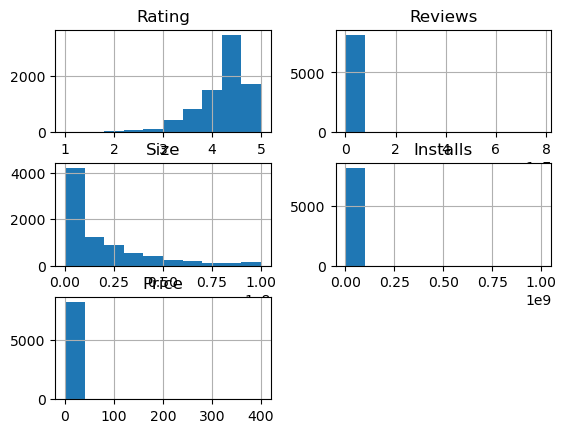

In [9]:
#Plot the histograms to observe the ditribution
cdf = df_data[['Rating','Reviews','Size','Installs','Price']]
cdf.hist()
plt.show()

In [10]:
#Change the column Rating into NumPy array
Y=df_data['Rating']
Y=Y.values
Y[0:5]

array([4.1, 3.9, 4.7, 4.5, 4.3])

In [11]:
#Prepare traning and testing data
X = df_data.drop(columns={'Category','Genres','Rating'})

In [12]:
#Check if there's any null value
X.isnull().sum()

Reviews                    0
Size                       0
Installs                   0
Price                      0
Free                       0
Paid                       0
content-rating-18+         0
content-rating-everyone    0
content-rating-10+         0
content-rating-17+         0
content-rating-12to18      0
Unrated                    0
ART_AND_DESIGN             0
AUTO_AND_VEHICLES          0
BEAUTY                     0
BOOKS_AND_REFERENCE        0
BUSINESS                   0
COMICS                     0
COMMUNICATION              0
DATING                     0
EDUCATION                  0
ENTERTAINMENT              0
EVENTS                     0
FAMILY                     0
FINANCE                    0
FOOD_AND_DRINK             0
GAME                       0
HEALTH_AND_FITNESS         0
HOUSE_AND_HOME             0
LIBRARIES_AND_DEMO         0
LIFESTYLE                  0
MAPS_AND_NAVIGATION        0
MEDICAL                    0
NEWS_AND_MAGAZINES         0
PARENTING     

In [13]:
#Standardise the data X then reassign it to the variable X using transformation
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.12851054,  0.01565768, -0.15716633, ..., -0.15279338,
        -0.13560006, -0.09413574],
       [-0.12810175, -0.20781398, -0.14875343, ..., -0.15279338,
        -0.13560006, -0.09413574],
       [-0.08450768, -0.44469394, -0.07149205, ..., -0.15279338,
        -0.13560006, -0.09413574],
       ...,
       [-0.12858862, -0.67263503, -0.15733631, ..., -0.15279338,
        -0.13560006, -0.09413574],
       [-0.12853321, -0.83353463, -0.15732085, ..., -0.15279338,
        -0.13560006, -0.09413574],
       [ 0.07205559,  0.01565768,  0.01435393, ..., -0.15279338,
        -0.13560006, -0.09413574]])

Use train_test_split to split the data into training and test data. Set the parameter test_size into 20%.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
#Check the number of test samples
print(f'Y train sample size: {Y_train.shape}')
print(f'Y test sample size: {Y_test.shape}')

Y train sample size: (6557,)
Y test sample size: (1640,)


### Multiple Linear Regression Model

First look at how each variable affect rating in a linear regression model.

In [16]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

yhat_lm = lm.predict(X_test)

In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean absolute error: %.2f' % np.mean(np.absolute(yhat_lm - Y_test)))
print('Mean square error: %.2f' % mean_squared_error(Y_test, yhat_lm))
print('R2-score: %.2f' % r2_score(Y_test, yhat_lm))

Mean absolute error: 0.36
Mean square error: 0.26
R2-score: 0.02


In [18]:
#Observe the coefficient of each independent variable
column = df_data.drop(columns={'Category','Genres','Rating'}).axes[1]
result=[lm.coef_[i] for i in range(0,len(column))]
df = pd.DataFrame(result).transpose()
df.columns = column
df

,Reviews,Size,Installs,Price,Free,Paid,content-rating-18+,content-rating-everyone,content-rating-10+,content-rating-17+,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,0.021381,0.009064,0.010773,-0.018745,-4.956918e+12,-4.956918e+12,-3.607330e+10,-7.435788e+11,-3.569610e+11,-3.849191e+11,...,3.240701e+12,3.051186e+12,3.256353e+12,2.537388e+12,2.690759e+12,3.034307e+12,4.894730e+12,2.585126e+12,2.305401e+12,1.615558e+12


In the regression model, we can see that the number of reviews has the closest relationship with the rating. However, we cannot control the number of reviews and installs. So I try another approach.

This time I take away reviews and installs. My aim is to create an app with rating equals to or above 4.5. Which means if rating >4.4, I treat the app as successful. I will use several clissification model to predict the success of an app.

In [19]:
#Import classification models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

Define a function to plot confussion matrix

In [20]:
def plot_confusion_matrix(y,y_predict):
    'a function to plot confussion matrix'
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y,y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['less than 4.5','equal or more than 4.5']); ax.yaxis.set_ticklabels(['less than 4.5','equal or more than 4.5'])

Make a list of outcome. If rating equal to or above 4.5, outcome = 1. If rating <4.5, outcome = 0.

In [21]:
# outcome = 0 if <4.5
# outcome = 1 if > or = 4.5
outcome = []
for i in df_data['Rating']:
    if i < 4.5:
        outcome.append(0)
    else:
        outcome.append(1)

In [22]:
df_data['Outcome'] = outcome
df_data.head()

,Category,Rating,Reviews,Size,Installs,Price,Genres,Free,Paid,content-rating-18+,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Outcome
0,ART_AND_DESIGN,4.1,159.0,19000000,10000,0.0,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,970.5,14000000,500000,0.0,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510.0,8700000,5000000,0.0,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,0.0,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ART_AND_DESIGN,4.3,967.0,2800000,100000,0.0,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Prepare the dataset

In [23]:
X_ml = df_data.drop(columns={'Category','Rating','Reviews','Installs','Genres','Free','Paid','Outcome'})
Y_ml = pd.Series(df_data['Outcome'].to_numpy())

In [24]:
#standardise the data X_ml
X_ml = StandardScaler().fit(X_ml).transform(X_ml)
#split the data into train and test set
x_ml_train, x_ml_test, y_ml_train, y_ml_test = train_test_split(X_ml, Y_ml, test_size=0.2)
print('Train set:', x_ml_train.shape)
print('Test set:', x_ml_test.shape)

Train set: (6557, 41)
Test set: (1640, 41)


### Decision Tree

In [25]:
#Create a dictionary to find the best parameters from the dictionary
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#create object of DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [26]:
appTree = GridSearchCV(tree,parameters,cv=10)
#fit data
appTree.fit(x_ml_train, y_ml_train)
#make prediction on testing dataset
predTree = appTree.predict(x_ml_test)

In [27]:
tree_acc = metrics.accuracy_score(y_ml_test,predTree)
print("DecisionTree's Accuracy:", tree_acc)

DecisionTree's Accuracy: 0.6957317073170731


In [28]:
print(classification_report(y_ml_test,predTree))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1145
           1       0.47      0.07      0.12       495

    accuracy                           0.70      1640
   macro avg       0.59      0.52      0.47      1640
weighted avg       0.64      0.70      0.61      1640



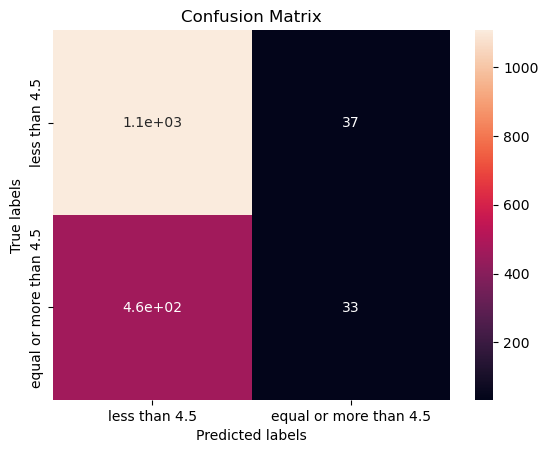

In [29]:
#plot confusion matrix
plot_confusion_matrix(y_ml_test,predTree)

### Logistic Regression

Create a dictionary to find the best parameters from the dictionary.

In [30]:
parameters = {'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
#Create a logistic regression object
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(x_ml_train,y_ml_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [31]:
predlr = logreg_cv.predict(x_ml_test)

Print the best parameters and the accuracy for logistic regression

In [32]:
print('Best parameters:', logreg_cv.best_params_)
#accuracy on validation data
print('accuracy on validation data:',logreg_cv.best_score_)
#accuracy score on the test data
logreg_acc = logreg_cv.score(x_ml_test,y_ml_test)
print('score:', logreg_acc)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy on validation data: 0.6876601191584435
score: 0.6926829268292682


In [33]:
print(classification_report(y_ml_test,predlr))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82      1145
           1       0.41      0.04      0.08       495

    accuracy                           0.69      1640
   macro avg       0.56      0.51      0.45      1640
weighted avg       0.61      0.69      0.59      1640



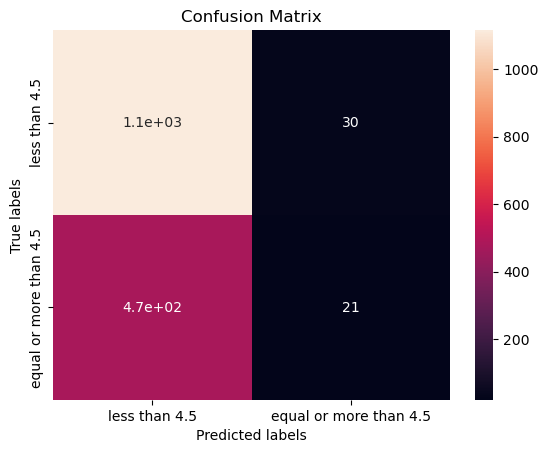

In [34]:
#plot confusion matrix
plot_confusion_matrix(y_ml_test,predlr)

### SVM (Support Vector Machines)

Create a dictionary to find the best parameters form the dictionary.

In [35]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid')}
svm = SVC()

In [36]:
svm_cv = GridSearchCV(svm,parameters,cv=5)
svm_cv.fit(x_ml_train,y_ml_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [37]:
predsvm = svm_cv.predict(x_ml_test)

In [38]:
print("best parameters",svm_cv.best_params_)
#accuracy on validation data
print('accuracy on validation data:',svm_cv.best_score_)
#accuracy score on the test data
svm_acc = svm_cv.score(x_ml_test,y_ml_test)
print('score:', svm_acc)

best parameters {'kernel': 'linear'}
accuracy on validation data: 0.6868989646704249
score: 0.6914634146341463


In [39]:
print(classification_report(y_ml_test,predsvm))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      1145
           1       0.40      0.04      0.08       495

    accuracy                           0.69      1640
   macro avg       0.55      0.51      0.45      1640
weighted avg       0.61      0.69      0.59      1640



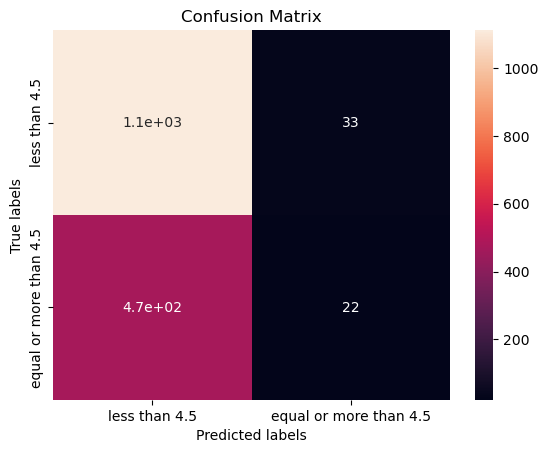

In [40]:
#plot confusion matrix
plot_confusion_matrix(y_ml_test,predsvm)

### K Nearest Neighbors

In [41]:
#Create a dictionary of parameters
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
#Create object
KNN = KNeighborsClassifier()

In [42]:
knn_cv = GridSearchCV(KNN, parameters,cv=5)
knn_cv.fit(x_ml_train,y_ml_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [43]:
predKNN = knn_cv.predict(x_ml_test)

In [44]:
print('best parameters:', knn_cv.best_params_)
#accuracy on validation data
print('accuracy on validate data:', knn_cv.best_score_)
#accuracy score on the test data
knn_acc = knn_cv.score(x_ml_test, y_ml_test)
print('score:', knn_acc)

best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 2}
accuracy on validate data: 0.6727151587877434
score: 0.675609756097561


In [45]:
print(classification_report(y_ml_test,predKNN))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1145
           1       0.40      0.14      0.21       495

    accuracy                           0.68      1640
   macro avg       0.55      0.52      0.50      1640
weighted avg       0.61      0.68      0.62      1640



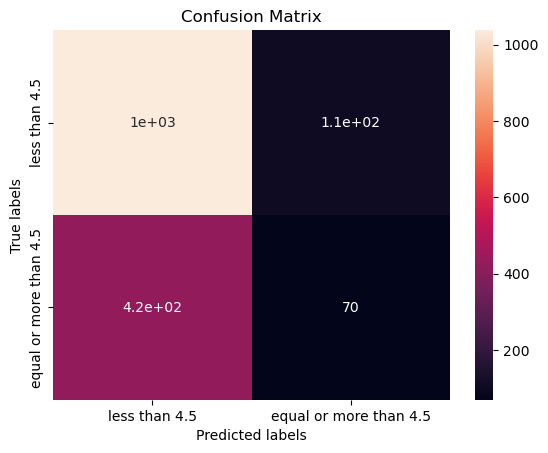

In [46]:
#plot confusion matrix
plot_confusion_matrix(y_ml_test,predKNN)

### Compare the Classification Models

Construct a table to compare the accuracy, f1 score and Jaccard Score of each classification model.

In [47]:
#import metrics
from sklearn.metrics import jaccard_score, f1_score
#A list of predicted values
yhat_list = [predTree,predlr,predsvm,predKNN]

#f1_score list
f1_scores = []
for element in yhat_list:
    f1_scores.append(f1_score(y_ml_test,element,average='weighted'))

#jaccard score list
j_score = []
for element in yhat_list:
    j_score.append(jaccard_score(y_ml_test,element,average='weighted'))

#accuracy list 
accuracy = [tree_acc,logreg_acc,svm_acc,knn_acc]

#store in dataframe
scores = pd.DataFrame(np.array([accuracy, f1_scores, j_score]),
                     index=['Accuracy','f1_score','Jaccard Score'],
                     columns=['Tree','LogReg','SVM','KNN'])
scores

,Tree,LogReg,SVM,KNN
Accuracy,0.695732,0.692683,0.691463,0.675610
f1_score,0.605109,0.592684,0.592913,0.618634
Jaccard Score,0.500100,0.492901,0.492407,0.496690


It is observed that Tree Diagram has the highest accuracy: 0.679. On the other hand, KNN has the highest f1 score and Jaccard Score, which are 0.596 and 0.475 respectively.

For all three metrics, the higher the value, the better a model can classify the data. As the metrics indicate different models are better, I have to decide which metric to use to access the models' quality.

For an uneven class distribution, f1 score is better than accuracy, as f1 score is a weighted average of precision and recall. So I look at the distribution of test data:

In [48]:
y_ml_test.value_counts()

0    1145
1     495
dtype: int64

We can see that the number of data with outcome 0 is much larger than the number of data with outcome 1. As the class distribution is uneven, f1 score and Jaccard Score should be use as the metrics to measure the model's accuracy on classification.

## Conclusion

After comparing the metrics of each classification model, I found out that K Nearest Neighbors model has the highest f1 score and Jaccard Score. Therefore, I select KNN model as the best classification model.